In [1]:
# Import standardowych bibliotek
import pandas as pd
import numpy as np
import itertools
from datetime import datetime as dt

# Import bibliotek do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Aktywacja wyświetlania wykresów w notebooku
%matplotlib inline

In [2]:
dataset = pd.read_csv(r'C:\Magisterka\Predicting-the-results-of-Premier-League-matches\TEST\final_dataset_2.csv')

In [3]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [4]:
X_all = dataset2.drop(['FTR'], axis=1)  # Użycie nazwanego argumentu axis
y_all = dataset2['FTR']

# Wybór kolumn do standaryzacji
cols = ['HTGD', 'ATGD', 'HTP', 'ATP']
X_all[cols] = scale(X_all[cols])  # Standaryzacja wybranych kolumn

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

In [6]:
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

In [7]:
if len(categorical_columns) > 0:
    X_train = pd.get_dummies(X_train, columns=categorical_columns)
    X_test = pd.get_dummies(X_test, columns=categorical_columns)
    

In [8]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [9]:
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [10]:
y_pred_default = classifier.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           H       0.00      0.00      0.00       401
          NH       0.56      1.00      0.72       511

    accuracy                           0.56       912
   macro avg       0.28      0.50      0.36       912
weighted avg       0.31      0.56      0.40       912



C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

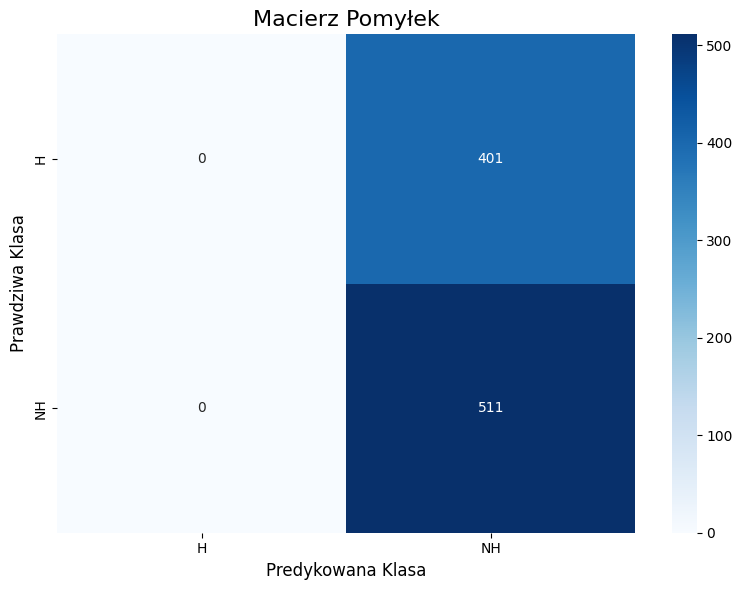

C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

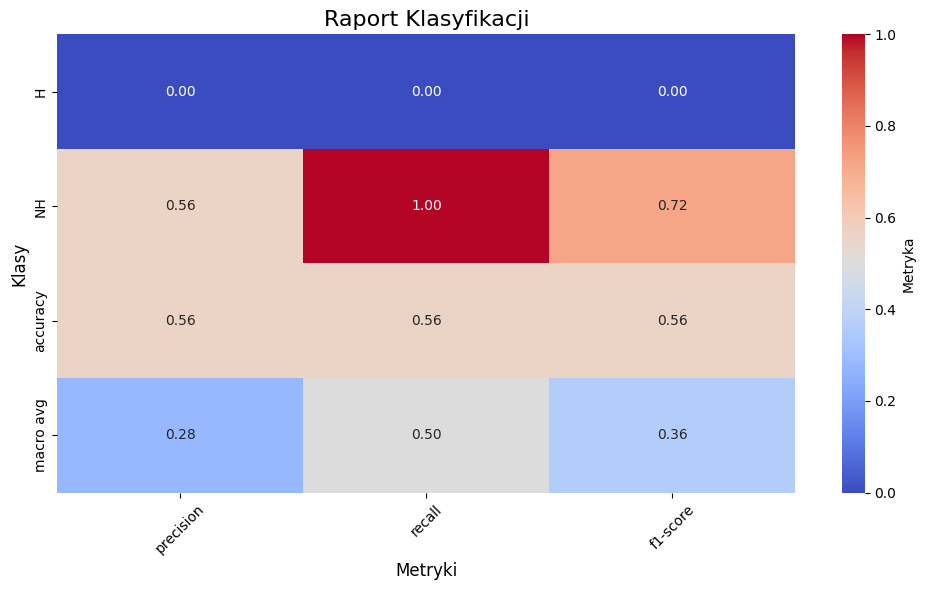

In [12]:
def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predykowana Klasa", fontsize=12)
    plt.ylabel("Prawdziwa Klasa", fontsize=12)
    plt.title("Macierz Pomyłek", fontsize=16)
    plt.tight_layout()
    plt.show()

# Funkcja do rysowania heatmapy raportu klasyfikacji
def plot_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report).transpose().round(2)

    # Wizualizacja heatmapy
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt='.2f', cbar_kws={'label': 'Metryka'})
    plt.title("Raport Klasyfikacji", fontsize=16)
    plt.xlabel("Metryki", fontsize=12)
    plt.ylabel("Klasy", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Wywołanie funkcji
labels = sorted(y_test.unique())  # Lista klas
plot_confusion_matrix(y_test, y_pred_default, labels)  # Macierz pomyłek
plot_classification_report(y_test, y_pred_default)  # Heatmapa raportu klasyfikacji

In [13]:
classifier = SVC(kernel='rbf', random_state=0, class_weight='balanced', probability=True)
classifier.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=0)

In [14]:
# Siatka parametrów
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# GridSearchCV
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid.best_params_)

# Najlepszy model
classifier = grid.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ......................C=0.1, gamma=0.01

In [15]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.52      0.58      0.55       401
          NH       0.64      0.58      0.61       511

    accuracy                           0.58       912
   macro avg       0.58      0.58      0.58       912
weighted avg       0.58      0.58      0.58       912



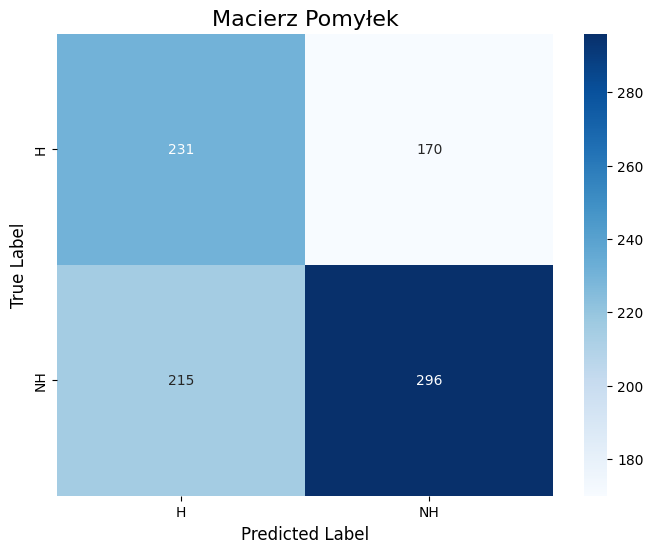

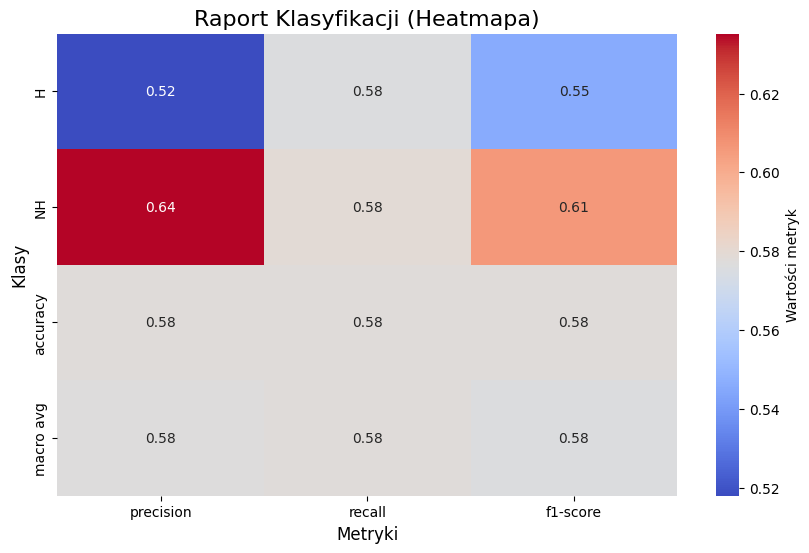

In [16]:
def plot_results(y_test, y_pred, classifier=None, X_test=None):


    # Macierz Pomyłek
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title("Macierz Pomyłek", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.show()

    # Raport Klasyfikacji w formie heatmapy
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt='.2f', cbar_kws={'label': 'Wartości metryk'})
    plt.title("Raport Klasyfikacji (Heatmapa)", fontsize=16)
    plt.xlabel("Metryki", fontsize=12)
    plt.ylabel("Klasy", fontsize=12)
    plt.show()

plot_results(y_test, y_pred, classifier=classifier, X_test=X_test)